![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-07T13:46:23.439907-04:00

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 52
Architecture: 64bit



In [3]:
import os
import time
start = time.time()
chapter_number = 6
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import mxnet

In [5]:
%watermark -iv

matplotlib: 3.5.2
mxnet     : 1.9.1
numpy     : 1.23.1



# Deep Learning workflow with MXNet

## Using MXNet

## Introduction

MXNet is a Deep Learning Engine developed by Apache Foundation. It is composed on top of two main concepts. 

  * **NDArray**: Basic manipulation of multi-dimensional arrays. This is a sort of replacement for Numpy
  
  * **Gluon**: The Actual Neural Network engine that uses NDArray for the operation.

In this notebook, we will discuss Gluon the MXNet Neural Network engine.

## Gluon: The MXNet Neural Network engine

Gluon is the NN engine for MXNet. It works on top of the NDArray package (nd).
This module will be in charge of forward and backward propagations and the corresponding gradient evaluations.

In [6]:
from mxnet import nd
from mxnet.gluon import nn

We can a layer with two outputs like this. So far the number of inputs remains undefined.

In [7]:
layer = nn.Dense(2)
layer

Dense(None -> 2, linear)

In [8]:
layer.initialize()

In [9]:
layer.params

dense0_ (
  Parameter dense0_weight (shape=(2, 0), dtype=float32)
  Parameter dense0_bias (shape=(2,), dtype=float32)
)

In [10]:
x = nd.random.uniform(-1,1,(6,4))
x


[[ 0.09762704  0.18568921  0.43037868  0.6885315 ]
 [ 0.20552671  0.71589124  0.08976638  0.6945034 ]
 [-0.15269041  0.24712741  0.29178822 -0.23123658]
 [-0.1248256  -0.40493077  0.783546   -0.88657403]
 [ 0.9273255  -0.45468742 -0.23311698 -0.04466975]
 [ 0.5834501   0.62433743  0.0577898  -0.04004568]]
<NDArray 6x4 @cpu(0)>

In [11]:
layer(x)


[[ 0.0561824  -0.02068388]
 [ 0.02923797 -0.01942167]
 [ 0.00134188 -0.01811863]
 [ 0.00986116 -0.04696713]
 [-0.00033285 -0.03279177]
 [-0.00225417 -0.05342289]]
<NDArray 6x2 @cpu(0)>

In [12]:
layer.weight.data()


[[ 0.00952624 -0.01501013  0.05958354  0.04705103]
 [-0.06005495 -0.02276454 -0.0578019   0.02074406]]
<NDArray 2x4 @cpu(0)>

### Building the layers of a Neural Network

In [13]:
net = nn.Sequential()
# Add a sequence of layers.
net.add(# Similar to Dense, it is not necessary to specify the input channels
        # by the argument `in_channels`, which will be  automatically inferred
        # in the first forward pass. Also, we apply a relu activation on the
        # output. In addition, we can use a tuple to specify a  non-square
        # kernel size, such as `kernel_size=(2,4)`
        nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        # One can also use a tuple to specify non-symmetric pool and stride sizes
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        # The dense layer will automatically reshape the 4-D output of last
        # max pooling layer into the 2-D shape: (x.shape[0], x.size/x.shape[0])
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 84, Activation(relu))
  (6): Dense(None -> 10, linear)
)

In [14]:
net.initialize()
# Input shape is (batch_size, color_channels, height, width)
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape


(4, 10)

In [15]:
(net[0].weight.data().shape, net[5].bias.data().shape)

((6, 1, 5, 5), (84,))

In [16]:
class MixMLP(nn.Block):
    def __init__(self, **kwargs):
        # Run `nn.Block`'s init method
        super(MixMLP, self).__init__(**kwargs)
        self.blk = nn.Sequential()
        self.blk.add(nn.Dense(3, activation='relu'),
                     nn.Dense(4, activation='relu'))
        self.dense = nn.Dense(5)
    def forward(self, x):
        y = nd.relu(self.blk(x))
        print(y)
        return self.dense(y)

net = MixMLP()
net

MixMLP(
  (blk): Sequential(
    (0): Dense(None -> 3, Activation(relu))
    (1): Dense(None -> 4, Activation(relu))
  )
  (dense): Dense(None -> 5, linear)
)

In [17]:
net.initialize()
x = nd.random.uniform(shape=(2,2))
net(x)



[[0.0000000e+00 0.0000000e+00 2.1124959e-05 6.4140244e-05]
 [0.0000000e+00 0.0000000e+00 2.2888425e-04 5.9812423e-04]]
<NDArray 2x4 @cpu(0)>



[[ 1.1762703e-06  4.1317880e-06 -3.8491835e-06  3.0992906e-06
  -1.3130855e-06]
 [ 1.3158094e-05  3.9258030e-05 -3.8034632e-05  2.8098164e-05
  -1.1850575e-05]]
<NDArray 2x5 @cpu(0)>

In [18]:
net.blk[1].weight.data()


[[-0.04485548  0.00594983 -0.06654498]
 [ 0.04964591 -0.06058505  0.03413684]
 [ 0.02511498 -0.00299651 -0.00648244]
 [ 0.02479142  0.00512109  0.01498631]]
<NDArray 4x3 @cpu(0)>

## Automatic calculation of derivatives

In [19]:
from mxnet import nd
from mxnet import autograd

In [20]:
x = nd.array(((1, 2, 3),(4, 5, 6),(7, 8, 9)))
x


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
<NDArray 3x3 @cpu(0)>

In [21]:
x.attach_grad()

In [22]:
with autograd.record():
    y = 2 * x * x

In [23]:
y.backward()
y


[[  2.   8.  18.]
 [ 32.  50.  72.]
 [ 98. 128. 162.]]
<NDArray 3x3 @cpu(0)>

In [24]:
x.grad


[[ 4.  8. 12.]
 [16. 20. 24.]
 [28. 32. 36.]]
<NDArray 3x3 @cpu(0)>

In [25]:
def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() >= 0:
        c = b[0]
    else:
        c = b[1]
    return c

Lets plot this function

In [26]:
delta = 0.01
x = y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
z = np.stack((X,Y),axis=-1);

In [27]:
def ff(x):
    a = nd.array(x)
    return f(a).asnumpy()

In [28]:
zt = np.apply_along_axis(ff, 2, z )
Z = np.squeeze(zt, axis=2)

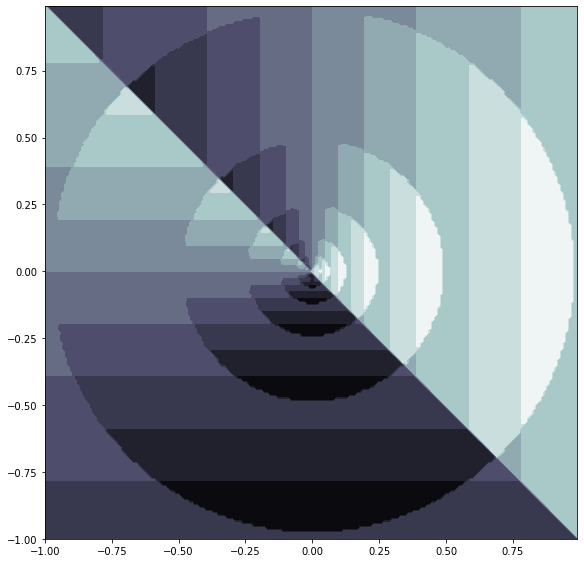

In [29]:
fig1, ax2 = plt.subplots(constrained_layout=True, figsize=(8,8))
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin='lower')
ax2.set_aspect('equal')

In [30]:
z[0,0]

array([-1., -1.])

In [31]:
ff(z[0,0])

array([-1024.], dtype=float32)

In [32]:
a = nd.random.uniform(shape=2)
a


[0.8310484 0.5197112]
<NDArray 2 @cpu(0)>

In [33]:
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

In [34]:
c


[850.9936]
<NDArray 1 @cpu(0)>

In [35]:
[a.grad, c/a]

[
 [1024.    0.]
 <NDArray 2 @cpu(0)>,
 
 [1024.     1637.4355]
 <NDArray 2 @cpu(0)>]

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfellow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelien Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

In [ ]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [ ]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')